# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

There are numerous factors that can factor in a lenders decision in approving a loan application. For instance, some possible factors can be:
1. Income
2. Assets/Collateral held
3. Term of loan considered
4. Credit score
5. Education
6. Family status

#### Possible hypotheses
From the possible factors listed above, we can hypothesizes as to why they would affect the probability of a lender approving a loan application. 

1. **Income**: A higher income can be used as a proxiy for an individuals ability to pay
2. **Assets/Collateral**: Adequate assets/collateral for loans would allow greater risk tolerance by a lender, with respect to a prospective loanee
3. **Loan Term**: shorter term loans result to less exposure to changes in financial circumstances for the lender. Furthermore, shorter term loans usually also mean higher monthly payments so lender recoups more money immediately.
4. **Credit Score**: past data to infer your "trustworthiness" as debtor. Thus, higher credit score may result in greater willingness for a lender to loan money
5. **Education**: generally, there is a positive correleation between education and lifetime income that may make graduation a proxy for your earning capacity and thus abaility to pay loan. 
6. **Family Status**: By this we mean whether the applicant has a family. This may affect the type of loan to be requested by an applicant. For instance, an applicant with a family may be more likely to apply for loans that are related to more longer term investments like housing and education, which correspond to loans that either will have correpsonding collateral or result in returns for the applicant that will result in greater abillity to pay. 


## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("data_miniprojectIV.csv") 
df.head()

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
def null_values_perc(df):
    total_null = df.isnull().sum().sort_values(ascending=False)
    percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) 
    null_df = pd.concat([total_null, percent_null], axis=1, keys=['Total', 'Percent'])
    return null_df
null_values_perc(df)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [51]:
# Descriptive Stats for Numeric Var
df.select_dtypes(include='number').describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.00000
CoapplicantIncome,614.0,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.00000
LoanAmount,614.0,146.412162,84.037468,9.000000,100.250000,129.000000,164.750000,700.00000
Loan_Amount_Term,614.0,342.410423,64.428629,12.000000,360.000000,360.000000,360.000000,480.00000
Credit_History,614.0,0.855049,0.352339,0.000000,1.000000,1.000000,1.000000,1.00000
ApplicantTotalIncome,614.0,7024.705081,6458.663872,1442.000000,4166.000000,5416.500000,7521.750000,81000.00000
LoanAmount_log,614.0,4.862066,0.496575,2.197225,4.607658,4.859812,5.104426,6.55108


In [52]:
df['ApplicantIncome'].median()

3812.5

In [5]:
# How many Applicants have a Credit History?
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
> As the above illustates, we have 475 applicants with some credit history
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
> From the descripive statistics above, that the mean/expected tendency of the distribution is not located in the center of the distribution. This can be inferred by the huge gap between the 75 percentile of the distribution and its maximum value, a gap not reflected between the 25th percentile and minimum value of the distribution. 




Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
# 3. Number of Unique Values of Nominal Categorival Variables
categorical = list(set(df.columns) - set(df.select_dtypes(include='number').columns))
df_categorical = df[categorical]
df_categorical.nunique() # gives number of unique values


Loan_Status        2
Property_Area      3
Dependents         4
Loan_ID          614
Gender             2
Self_Employed      2
Education          2
Married            2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [7]:
# 4. Frequency of Classes w/in Categorical variables
df_categorical1 = df_categorical.drop('Loan_ID', axis=1)
df_cat_col = list(df_categorical1.columns)

for cat_column in df_cat_col:
    print(df[cat_column].value_counts())
    # NOTE: get this into dataframe form
    

Y    422
N    192
Name: Loan_Status, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Male      489
Female    112
Name: Gender, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

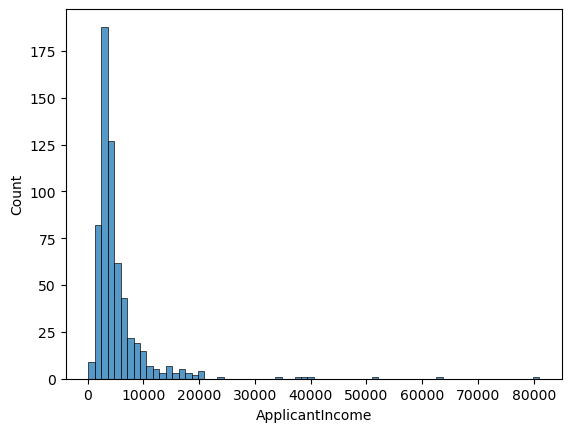

In [10]:
numeric_col = list(df.select_dtypes(include='number').columns)
# Distribution of Variables
sns.histplot(df['ApplicantIncome'], bins=70)



<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

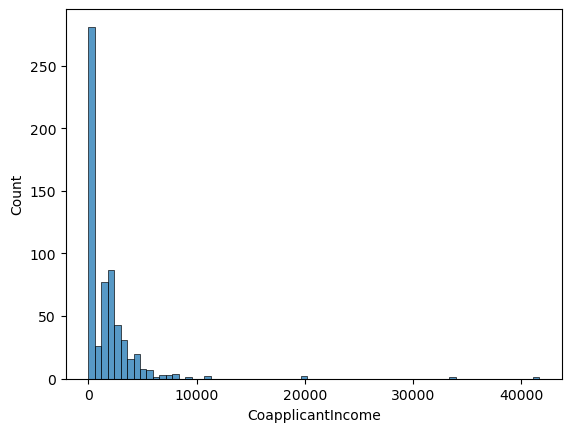

In [11]:
sns.histplot(df['CoapplicantIncome'], bins=70)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

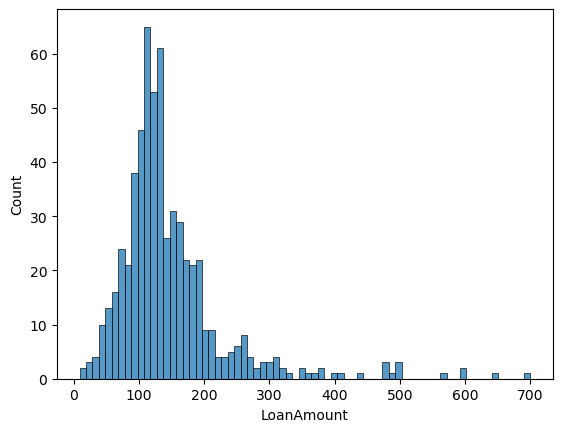

In [12]:
sns.histplot(df['LoanAmount'], bins=70)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

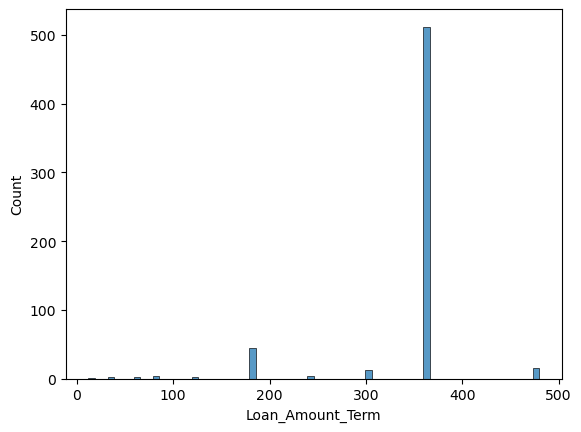

In [13]:
sns.histplot(df['Loan_Amount_Term'], bins = 70)

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

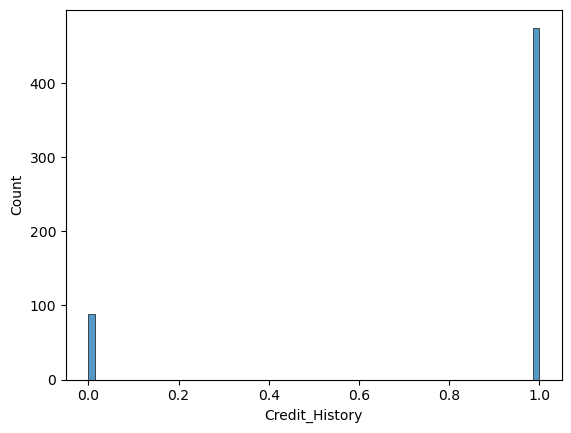

In [14]:
sns.histplot(df['Credit_History'], bins=70)


Look at box plots to understand the distributions. 

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

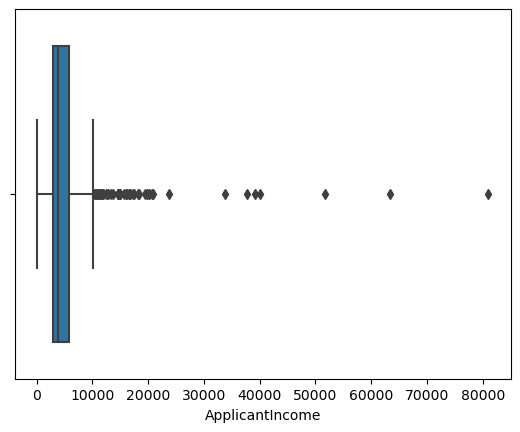

In [15]:
#boxplots
sns.boxplot(df['ApplicantIncome'])

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

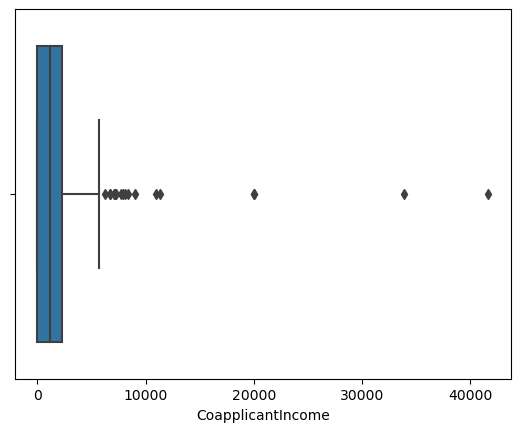

In [16]:
sns.boxplot(df['CoapplicantIncome'])

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

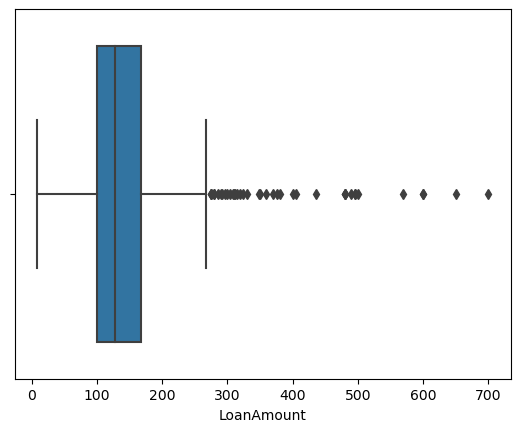

In [17]:
sns.boxplot(df['LoanAmount'])

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

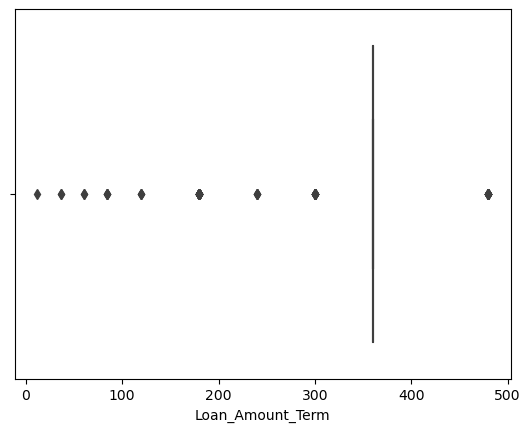

In [18]:
sns.boxplot(df['Loan_Amount_Term'])

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

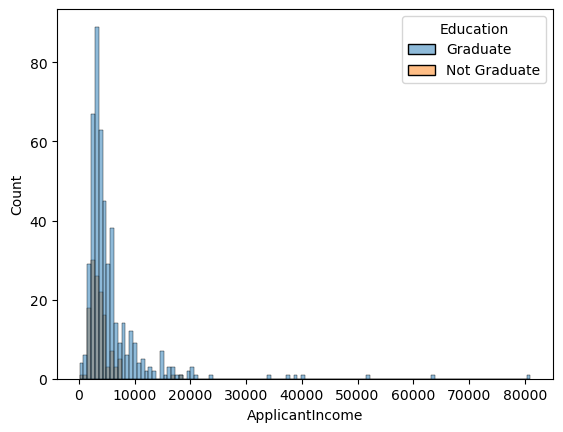

In [19]:

# Applicant Income segregated by Education
sns.histplot(data = df, x = 'ApplicantIncome', hue='Education')

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

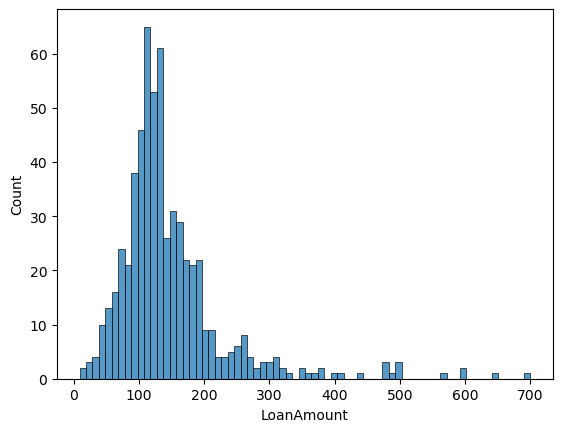

In [20]:
# histogram and boxplot of Loan Amount
sns.histplot(df['LoanAmount'], bins=70)

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

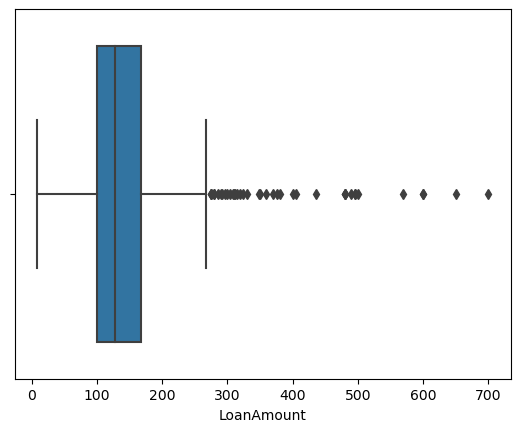

In [21]:
sns.boxplot(df['LoanAmount'])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

/home/reubenaboye/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Average Loan Amount')

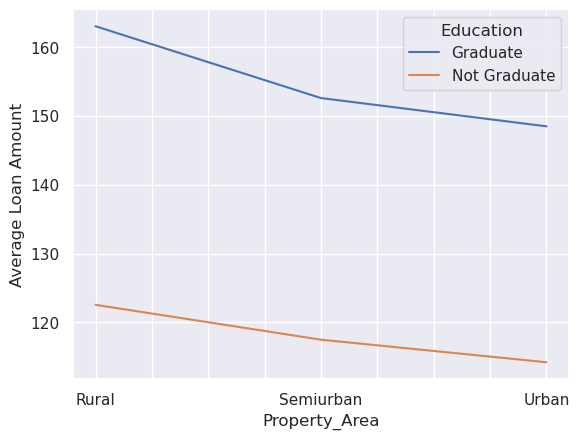

In [22]:
sns.set()
df.pivot_table('LoanAmount', index= 'Property_Area', columns='Education').plot()
plt.ylabel('Average Loan Amount')


In [24]:
df1 = df
df1['ApplicantTotalIncome'] = df1['ApplicantIncome'] + df1['CoapplicantIncome']
df1 = df1.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

/home/reubenaboye/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Average Income')

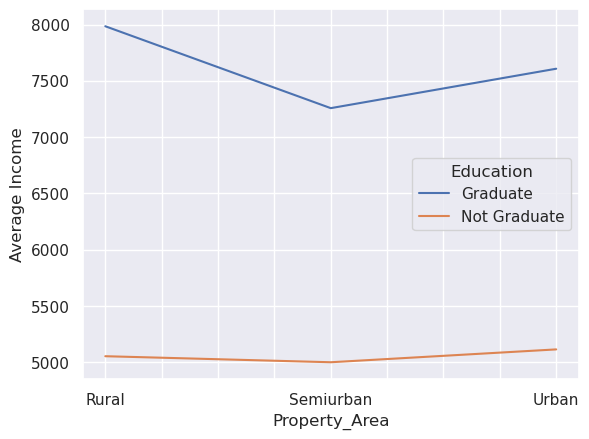

In [25]:
sns.set()
df1.pivot_table('ApplicantTotalIncome', index= 'Property_Area', columns='Education').plot()
plt.ylabel('Average Income')


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='ApplicantTotalIncome'>

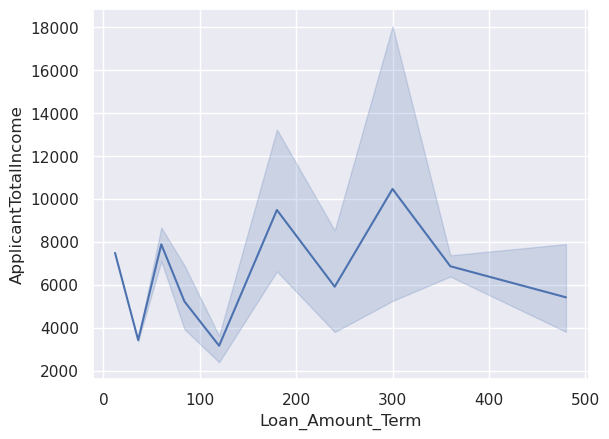

In [27]:
sns.lineplot(data=df1, x="Loan_Amount_Term", y="ApplicantTotalIncome")


<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantTotalIncome'>

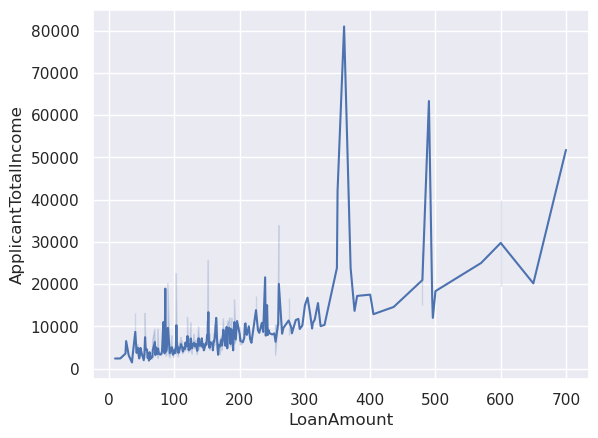

In [28]:
sns.lineplot(data=df1, x="LoanAmount", y="ApplicantTotalIncome")

/home/reubenaboye/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Average Loan Amount')

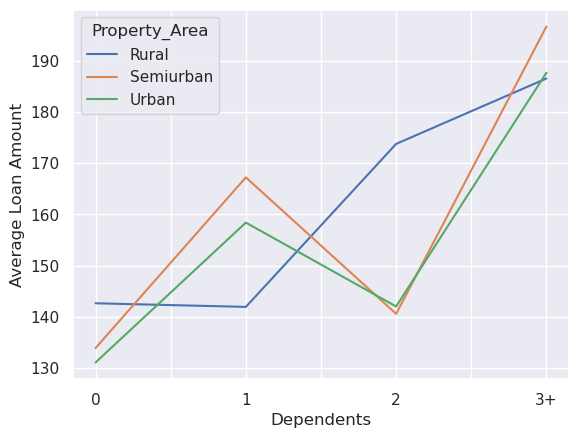

In [29]:
df1.pivot_table('LoanAmount', index= 'Dependents', columns='Property_Area').plot()
plt.ylabel('Average Loan Amount')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [30]:
def fill_null_val_mean(df, df_col):
    """
    Fills null values in a column with the column's mean value. 
    Note: dataframe column (df_col) must be of numeric type
    """
    col_mean = df[df_col].mean()
    df[df_col].fillna(col_mean, inplace=True)
    return print("Number of Nulls left:",df[df_col].isnull().sum())

def fill_null_val_mode(df, df_col):
    """
    Fills null values in a column with the column's mode value. 
    """
    col_mode = df[df_col].mode()[0]
    df[df_col].fillna(col_mode, inplace=True)
    return print("Number of Nulls left:",df[df_col].isnull().sum())



In [31]:
fill_null_val_mode(df, 'Credit_History')
fill_null_val_mode(df, 'Self_Employed')
fill_null_val_mode(df, 'Dependents')
fill_null_val_mode(df, 'Loan_Amount_Term')
fill_null_val_mode(df, 'Gender')
fill_null_val_mode(df, 'Married')
fill_null_val_mean(df, 'LoanAmount')

Number of Nulls left: 0
Number of Nulls left: 0
Number of Nulls left: 0
Number of Nulls left: 0
Number of Nulls left: 0
Number of Nulls left: 0
Number of Nulls left: 0


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

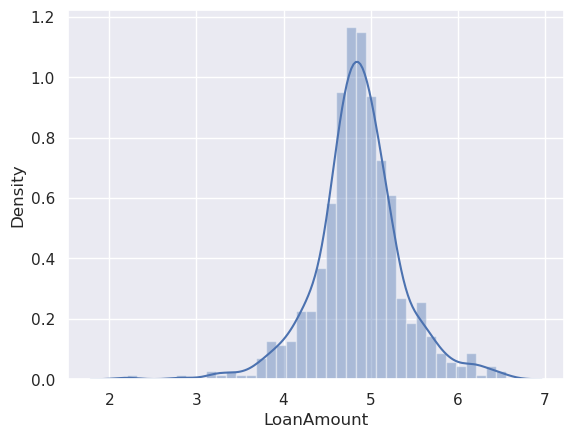

In [36]:
# LoG TRANSFORMATION
sns.distplot(np.log(df['LoanAmount']))
#sns.distplot((df['LoanAmount']))
#df['LoanAmount_log'] = np.log(df['LoanAmount'])

Combine both incomes as total income and take a log transformation of the same.

/home/reubenaboye/anaconda3_2/envs/MLWalkthrough/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantTotalIncome', ylabel='Density'>

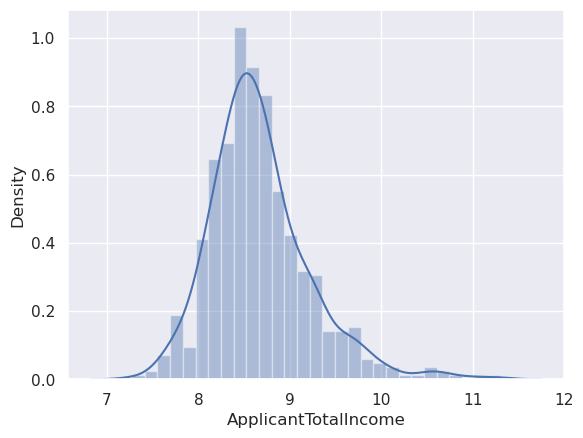

In [35]:
df['ApplicantTotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.distplot(np.log(df['ApplicantTotalIncome']))


## 4. Building a Predictive Model

In [40]:
from sklearn.model_selection import train_test_split

y = df['Loan_Status']
X = df.drop('Loan_Status', axis=1)
X = X.drop('Loan_ID', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.3, random_state = 1121218)


### 4.1. Data Preprocessing

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer

#### 1. Feature Preprocessing and Encoding

In [38]:
#   1.1. Feature Extraction: Total Applicant Income
class DataFrameFeatureExtraction():
    def __init__(self, func):
        self.func = func
    
    def transform(self, input_df, **transform_params):
        return self.func(input_df)
    
    def fit(self, X, y=None, **fit_params):
        return self

def create_total_applicantincome(input_df):
    input_df['ApplicantTotalIncome'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    input_df = input_df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
    return input_df

feature_extraction = Pipeline([
    ('get total applicant income', DataFrameFeatureExtraction(create_total_applicantincome))
])

In [41]:
#   1.2. Numeric Feactures
numeric_feat = feature_extraction.fit_transform(X_train).select_dtypes(include='number').columns.tolist()

numeric_pipeline = (Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
]))
#   1.3. Categorical Features
cat_feat = feature_extraction.fit_transform(X_train).select_dtypes(exclude='number').columns.tolist()

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

#   1.4. Merge Feature Preprocessing Pipelines
preprocessing = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numeric_feat),
    ('category', categorical_pipeline, cat_feat)
])

### 2. Feature Engineering

In [42]:
#   2.2. PCA & Subset Selection Pipelines
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest 
selection = SelectKBest(k=4)
pca = PCA(n_components=6)
feature_engineering = Pipeline(steps=[
    ('pca', pca),
    ('kbest', selection)])


In [43]:
#   2.3. Merge Feature Engineering and Preprocessing Pipelines
feature_processing = Pipeline(steps=[
    ('extract_features', feature_extraction),
    ('preprocessing', preprocessing),
    ('featureengineering', feature_engineering)
])

### 4.2. Modelling and Estimation

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
model_pipeline = Pipeline(steps=[
    ('feature_preprocessing_engineering', feature_processing),
    ('classifier', rf)
])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_preprocessing_engineering',
                 Pipeline(steps=[('extract_features',
                                  Pipeline(steps=[('get total applicant income',
                                                   <__main__.DataFrameFeatureExtraction object at 0x7fb386e314f0>)])),
                                 ('preprocessing',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('impute',
                                                                                    SimpleImputer()),
                                                                                   ('scale',
                                                                                    StandardScaler())]),
                                                                   ['LoanAmount',
                                                                    'Loan_Am...
                                                                  ('category',
                                                                   Pipeline(steps=[('impute',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one-hot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Gender',
                                                                    'Married',
                                                                    'Dependents',
                                                                    'Education',
                                                                    'Self_Employed',
                                                                    'Property_Area'])])),
                                 ('featureengineering',
                                  Pipeline(steps=[('pca', PCA(n_components=6)),
                                                  ('kbest',
                                                   SelectKBest(k=4))]))])),
                ('classifier', RandomForestClassifier())])

### 4.3. Model Selection & Hyperparameter Tuning

Try paramater grid search to improve the results

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
param_grid = {"feature_preprocessing_engineering__featureengineering__pca__n_components": [4,5,6],
                  "feature_preprocessing_engineering__featureengineering__kbest__k": [1, 2, 3],
                  "classifier__n_estimators":[2, 5, 10],
                  "classifier__max_depth":[2, 4, 6]}
#scoring = {'Accuracy': make_scorer(accuracy_score), 'Precision': make_scorer(precision_score), 'Recall': make_scorer(recall_score)}
search = GridSearchCV(model_pipeline, param_grid, cv=10, scoring=make_scorer(accuracy_score), verbose=10)
search.fit(X_train, y_train)

print('Best Parameters:', search.best_params_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV 1/10; 1/81] START classifier__max_depth=2, classifier__n_estimators=2, feature_preprocessing_engineering__featureengineering__kbest__k=1, feature_preprocessing_engineering__featureengineering__pca__n_components=4
[CV 1/10; 1/81] END classifier__max_depth=2, classifier__n_estimators=2, feature_preprocessing_engineering__featureengineering__kbest__k=1, feature_preprocessing_engineering__featureengineering__pca__n_components=4;, score=0.791 total time=   0.1s
[CV 2/10; 1/81] START classifier__max_depth=2, classifier__n_estimators=2, feature_preprocessing_engineering__featureengineering__kbest__k=1, feature_preprocessing_engineering__featureengineering__pca__n_components=4
[CV 2/10; 1/81] END classifier__max_depth=2, classifier__n_estimators=2, feature_preprocessing_engineering__featureengineering__kbest__k=1, feature_preprocessing_engineering__featureengineering__pca__n_components=4;, score=0.860 total time=   0.0s
[CV 3/1

**Update Model with Optimal Parameters**

In [53]:
# Update Model w/ Optimal Parameters
selection = SelectKBest(k=2)
pca = PCA(n_components=6)
rf = RandomForestClassifier(n_estimators=5, max_depth=2)
feature_engineering = Pipeline(steps=[
    ('pca', pca),
    ('kbest', selection)])
model_pipeline = Pipeline(steps=[
    ('feature_preprocessing_engineering', feature_processing),
    ('classifier', rf)
    ])
model_pipeline.fit(X_train, y_train)



Pipeline(steps=[('feature_preprocessing_engineering',
                 Pipeline(steps=[('extract_features',
                                  Pipeline(steps=[('get total applicant income',
                                                   <__main__.DataFrameFeatureExtraction object at 0x7fb386e314f0>)])),
                                 ('preprocessing',
                                  ColumnTransformer(transformers=[('numeric',
                                                                   Pipeline(steps=[('impute',
                                                                                    SimpleImputer()),
                                                                                   ('scale',
                                                                                    StandardScaler())]),
                                                                   ['LoanAmount',
                                                                    'Loan_Am...
                                                                   Pipeline(steps=[('impute',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('one-hot',
                                                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                                                   ['Gender',
                                                                    'Married',
                                                                    'Dependents',
                                                                    'Education',
                                                                    'Self_Employed',
                                                                    'Property_Area'])])),
                                 ('featureengineering',
                                  Pipeline(steps=[('pca', PCA(n_components=6)),
                                                  ('kbest',
                                                   SelectKBest(k=4))]))])),
                ('classifier',
                 RandomForestClassifier(max_depth=2, n_estimators=5))])

### 4.4. Model Evaluation

**Model Accuracy**

In [54]:
pred = model_pipeline.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.8162162162162162


**Confusion Matrix**

Confusion matrix

 [[ 24  31]
 [  3 127]]


Text(0.5, 1.0, 'Confusion Matrix')

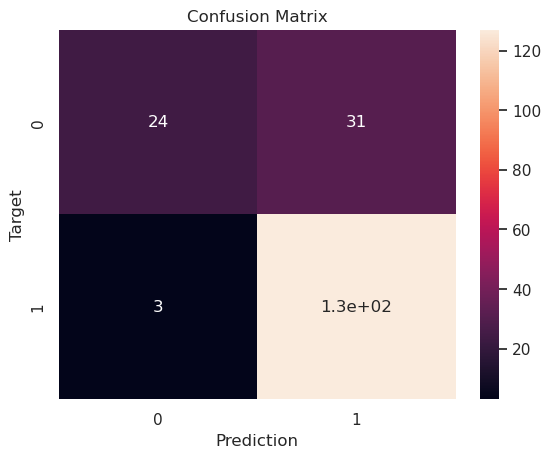

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
print('Confusion matrix\n\n', cm)
plt.figure()
sns.heatmap(cm, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

**Classification Report**

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           N       0.89      0.44      0.59        55
           Y       0.80      0.98      0.88       130

    accuracy                           0.82       185
   macro avg       0.85      0.71      0.73       185
weighted avg       0.83      0.82      0.79       185



## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python